# Exporting figures

In the presented demo we show how you can dump to files plots when you don't want to write them in files jupyter notebooks. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
data1 = [1, 2, 3, 4]
data2 = [10, -10, 10, -10]

IPython2CWL has a category of types which called *dumpables*. *Dumpables* are variables that you want to dump them into files at the compiled version (as a CWL command line tool) but you don't want to write them to files when you work in the Jupyter Notebook. For more information about dumpables see the [docs](https://ipython2cwl.readthedocs.io/).

---------------------------------------------------------

A very common case of a dumpable variable is when you have matplotlib plots in the Jupyter Notebook. For such simple usecases there is build in support with the `CWLPNGPlot` & `CWLPNGFigure`. The difference between them is that the `CWLPNGPlot` can be used to write multiple lines in the same file, in contrast to `CWLPNGFigure` which creates a new figure and then write only that to a file.

The following cell as a step in the cwl will create an image with name p1.png

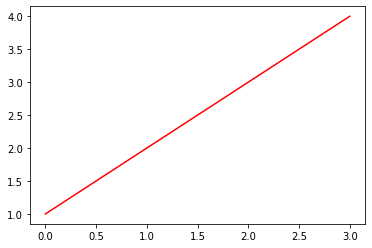

In [2]:
p1: 'CWLPNGFigure' = plt.plot(data1, 'r-')

The following cell as a step in the cwl will create an image with name p2.png

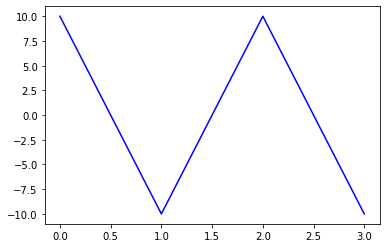

In [3]:
p2: 'CWLPNGFigure' = plt.plot(data2, 'b-')

Now we want to create a image with multiple plots. Jupyter Notebook automaticly groups plots which belong to the same cell. In order to say to the ipython2cwl to group them together you have to the `CWLPNGPlot`. 

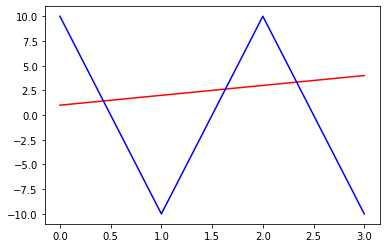

In [4]:
plt.plot(data1, 'r-')
p3: 'CWLPNGPlot' = plt.plot(data2, 'b-')

Now the Jupyter Notebook developer handles management of the figures so you can use both `CWLPNGPlot` & `CWLPNGFigure` and you will have the same result.

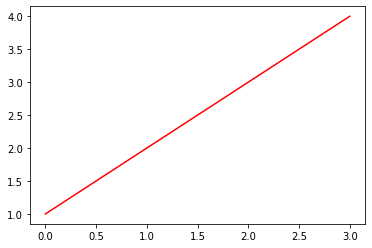

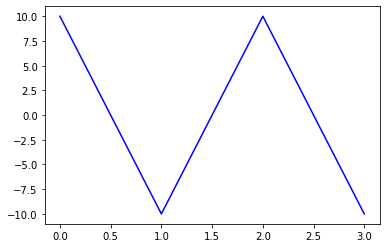

In [5]:
plt.figure()
p4: 'CWLPNGPlot' = plt.plot(data1, 'r-')
plt.figure()
p5: 'CWLPNGPlot' = plt.plot(data2, 'b-')

The following lines illustrate how to compile the repo. Uncomment them without saving the notebook to execute the demo.

In [10]:
#!jupyter-repo2cwl . -o .

2020-07-09 20:50:28,198 - repo2cwl - INFO - copy repo to temp directory: /var/folders/k8/800hfw_n2md_2zb44lhhtqqr0000gn/T/repo2cwl_zoslrkuk/repo
[Repo2Docker] Picked Local content provider.

[Repo2Docker] Using local repo /var/folders/k8/800hfw_n2md_2zb44lhhtqqr0000gn/T/repo2cwl_zoslrkuk/repo.

[Repo2Docker] Using PythonBuildPack builder

[Repo2Docker] Step 1/51 : FROM buildpack-deps:bionic
[Repo2Docker] 

[Repo2Docker]  ---> 45b76b488328

[Repo2Docker] Step 2/51 : ENV DEBIAN_FRONTEND=noninteractive
[Repo2Docker] 

[Repo2Docker]  ---> Using cache

[Repo2Docker]  ---> 13e933248fc7

[Repo2Docker] Step 3/51 : RUN apt-get -qq update &&     apt-get -qq install --yes --no-install-recommends locales > /dev/null &&     apt-get -qq purge &&     apt-get -qq clean &&     rm -rf /var/lib/apt/lists/*
[Repo2Docker] 

[Repo2Docker]  ---> Using cache

[Repo2Docker]  ---> 60a9e5683647

[Repo2Docker] Step 4/51 : RUN echo "en_US.UTF-8 UTF-8" > /etc/locale.gen &&     locale-gen
[Repo2Docker] 

[Repo2Docke

[Repo2Docker] Removing intermediate container dd190c6e64a2

[Repo2Docker]  ---> 32bf07d4ed9c

[Repo2Docker] Step 46/51 : LABEL repo2docker.repo="local"
[Repo2Docker] 

[Repo2Docker]  ---> Running in 4c3616ce6e78

[Repo2Docker] Removing intermediate container 4c3616ce6e78

[Repo2Docker]  ---> 376d4a9058a5

[Repo2Docker] Step 47/51 : LABEL repo2docker.version="0.11.0"
[Repo2Docker] 

[Repo2Docker]  ---> Running in 4b3b644cf0bf

[Repo2Docker] Removing intermediate container 4b3b644cf0bf

[Repo2Docker]  ---> c6b30a95b975

[Repo2Docker] Step 48/51 : USER ${NB_USER}
[Repo2Docker] 

[Repo2Docker]  ---> Running in d5d7fbabdb1e

[Repo2Docker] Removing intermediate container d5d7fbabdb1e

[Repo2Docker]  ---> 9db0c76cba4f

[Repo2Docker] Step 49/51 : COPY /repo2docker-entrypoint /usr/local/bin/repo2docker-entrypoint
[Repo2Docker] 

[Repo2Docker]  ---> f7711fbf0372

[Repo2Docker] Step 50/51 : ENTRYPOINT ["/usr/local/bin/repo2docker-entrypoint"]
[Repo2Docker] 

[Repo2Docker]  ---> Running in c92922a

In [11]:
# !cat matplotlib-commons.cwl

arguments:
- --
baseCommand: /app/cwl/bin/matplotlib-commons
class: CommandLineTool
cwlVersion: v1.1
hints:
  DockerRequirement:
    dockerImageId: r2d-2fvar-2ffolders-2fk8-2f800hfw-5fn2md-5f2zb44lhhtqqr0000gn-2ft-2frepo2cwl-5fzoslrkuk-2frepo1594324230
inputs: {}
outputs:
  p1:
    outputBinding:
      glob: p1.png
    type: File
  p2:
    outputBinding:
      glob: p2.png
    type: File
  p3:
    outputBinding:
      glob: p3.png
    type: File
  p4:
    outputBinding:
      glob: p4.png
    type: File
  p5:
    outputBinding:
      glob: p5.png
    type: File


In [21]:
# !docker run $(grep 'dockerImageId' matplotlib-commons.cwl | awk '{print $2}') cat /app/cwl/bin/matplotlib-commons

#!/usr/bin/env ipython
"""
DO NOT EDIT THIS FILE
THIS FILE IS AUTO-GENERATED BY THE ipython2cwl.
FOR MORE INFORMATION CHECK https://github.com/giannisdoukas/ipython2cwl
"""


def main():
    get_ipython().run_line_magic('matplotlib', 'inline')
    import matplotlib.pyplot as plt
    data1 = [1, 2, 3, 4]
    data2 = [10, -10, 10, -10]
    import matplotlib.pyplot as plt
    plt.figure()
    p1 = plt.plot(data1, 'r-')
    p1[-1].figure.savefig('p1.png')
    import matplotlib.pyplot as plt
    plt.figure()
    p2 = plt.plot(data2, 'b-')
    p2[-1].figure.savefig('p2.png')
    plt.plot(data1, 'r-')
    p3 = plt.plot(data2, 'b-')
    p3[-1].figure.savefig('p3.png')
    plt.figure()
    p4 = plt.plot(data1, 'r-')
    p4[-1].figure.savefig('p4.png')
    plt.figure()
    p5 = plt.plot(data2, 'b-')
    p5[-1].figure.savefig('p5.png')
    get_ipython().system('jupyter-repo2cwl . -o .')


if __name__ == '__main__':
    import argparse
    import pathlib
    parser = argparse.ArgumentParser()
    

In [12]:
# !cwltool matplotlib-commons.cwl

INFO /Users/dks/.pyenv/versions/3.6.10/bin/cwltool 3.0.20200706173533
INFO Resolved 'matplotlib-commons.cwl' to 'file:///Users/dks/Workspaces/ipython2cwl-demo/matplotlib-commons.cwl'
INFO [job matplotlib-commons.cwl] /private/tmp/docker_tmpu7r7dhn1$ docker \
    run \
    -i \
    --mount=type=bind,source=/private/tmp/docker_tmpu7r7dhn1,target=/fRONcG \
    --mount=type=bind,source=/private/tmp/docker_tmp8i9133vi,target=/tmp \
    --workdir=/fRONcG \
    --read-only=true \
    --net=none \
    --user=501:20 \
    --rm \
    --env=TMPDIR=/tmp \
    --env=HOME=/fRONcG \
    --cidfile=/private/tmp/docker_tmp_3drpwzg/20200709205111-379808.cid \
    r2d-2fvar-2ffolders-2fk8-2f800hfw-5fn2md-5f2zb44lhhtqqr0000gn-2ft-2frepo2cwl-5fzoslrkuk-2frepo1594324230 \
    /app/cwl/bin/matplotlib-commons \
    --
2020-07-09 19:51:17,810 - repo2cwl - INFO - copy repo to temp directory: /tmp/repo2cwl_ouj4sz5c/repo
[Repo2Docker] ERROR | 
Docker client initialization error: Error while fetching server API ver

After executing the generated CWL CommandLineTool we take the following images

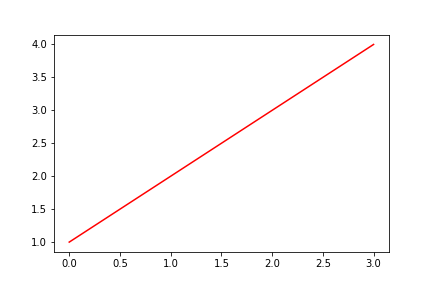

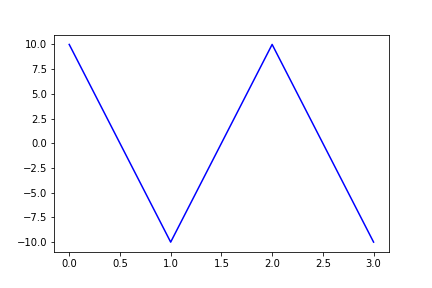

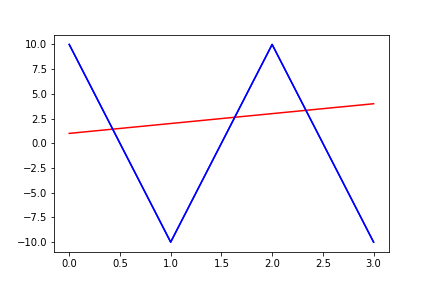

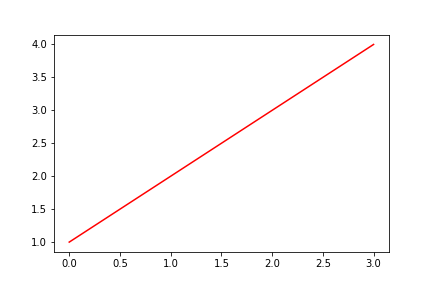

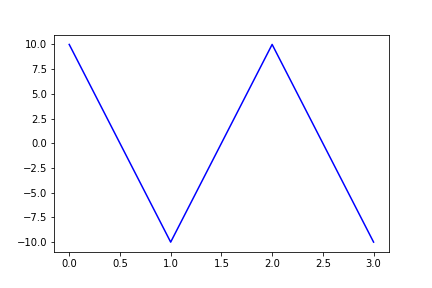

In [17]:
# from IPython.display import Image
# from IPython.display import display
# images = [Image(f"p{p}.png") for p in range(1,6)]
# display(*images)